Project 1
For your first project, you are asked to
Identify and load a network dataset that has some categorical information available for each node.
For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
Compare your centrality measures across your categorical groups.
For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.
You may work in a small group.  Your project should be delivered in an Jupyter Notebook, and posted in GitHub.  Your project is due end of day Sunday. You and your team should created a video presentation about your project. You should be ready to present your project in our Meet-up.

Data 620 Summer 2023

Project 1

Khyati Naik

Laura Puebla

video link: https://youtu.be/mucgw5sbvQ4

Degree Centrality:
  Group 1 Mean: 0.1439393939393939
  Group 2 Mean: 0.1313131313131313
  t-statistic: 0.30771051595386634
  p-value: 0.7602965514666284
Group: 1
Degree Centrality: [0.48484848484848486, 0.2727272727272727, 0.30303030303030304, 0.18181818181818182, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.09090909090909091, 0.030303030303030304, 0.06060606060606061, 0.15151515151515152, 0.06060606060606061, 0.06060606060606061, 0.09090909090909091, 0.06060606060606061]
Eigenvector Centrality: [0.36340322152371823, 0.26926245420725053, 0.32130498941520813, 0.21762871206321316, 0.0788212452510375, 0.08254575066824003, 0.08254575066824002, 0.17597634635563317, 0.07882124525103748, 0.05458375974340858, 0.08727193009064159, 0.23168960174762762, 0.024796904964651582, 0.09502743886678545, 0.15074069425877987, 0.09502743886678545]

Group: 2
Degree Centrality: [0.12121212121212122, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.0606

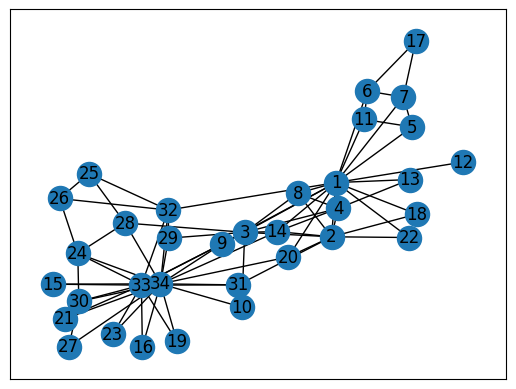

In [1]:
import networkx as nx
import scipy.stats as stats
import urllib.request
import matplotlib.pyplot as plt

# URL of the dataset file
url = 'https://raw.githubusercontent.com/Naik-Khyati/data620_web_anal/main/assignment%202/data/karate.txt'

# Download the dataset file
urllib.request.urlretrieve(url, 'karate.txt')

# Create an empty graph
graph = nx.Graph()

# Read the dataset and add edges to the graph
with open('karate.txt', 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
        source, target = map(int, line.strip().split())
        graph.add_edge(source, target)

# Categorical groups
group1 = [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
group2 = [9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(graph)

# Calculate eigenvector centrality for each node
eigenvector_centrality = nx.eigenvector_centrality(graph)

# Extract degree centrality for each group
group1_degree_centrality = [degree_centrality[node] for node in group1]
group2_degree_centrality = [degree_centrality[node] for node in group2]

# Perform a t-test
t_stat, p_value = stats.ttest_ind(group1_degree_centrality, group2_degree_centrality)

# Print the t-statistic and p-value
print("Degree Centrality:")
print("  Group 1 Mean:", sum(group1_degree_centrality) / len(group1_degree_centrality))
print("  Group 2 Mean:", sum(group2_degree_centrality) / len(group2_degree_centrality))
print("  t-statistic:", t_stat)
print("  p-value:", p_value)

# Compare centrality measures across categorical groups
categorical_groups = {1: group1, 2: group2}
for group, nodes in categorical_groups.items():
    group_degree_centrality = [degree_centrality[node] for node in nodes]
    group_eigenvector_centrality = [eigenvector_centrality[node] for node in nodes]

    print(f"Group: {group}")
    print(f"Degree Centrality: {group_degree_centrality}")
    print(f"Eigenvector Centrality: {group_eigenvector_centrality}")
    print()

# Visualization (optional)
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, with_labels=True)
plt.show()

there is no strong evidence to suggest a significant difference in degree centrality between Group 1 and Group 2 in the Karate network.